In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
import geopandas as gpd


In [17]:
df = pd.read_csv('../data/datasets/visa_data.csv')

In [18]:
df.head()

,iso3,country,apply,reject,rate,NAME
0,DEU,Almanya,223699,48040,21.00,Germany
1,AUT,Avusturya,12815,2613,20.40,Austria
2,BEL,Belçika,7212,2566,35.57,Belgium
3,DNK,Danimarka,5407,1822,33.69,Denmark
4,EST,Estonya,1517,786,52.10,Estonia


/tmp/ipykernel_294918/2738391537.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks)


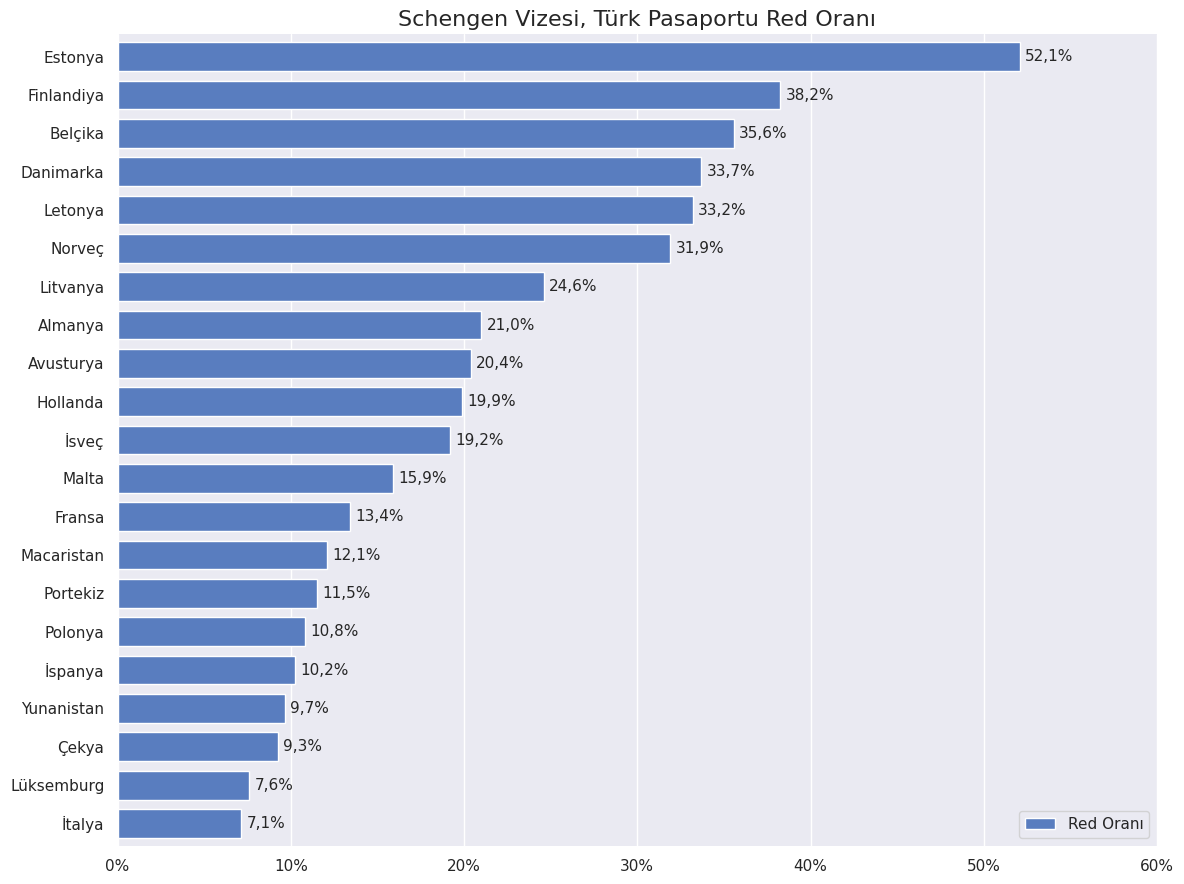

In [19]:
df = df.sort_values(by=['rate'], ascending=False)

f, ax = plt.subplots(figsize=(12, 9))

sns.set_color_codes("muted")
sns.barplot(x="rate", y="country", data=df,
            label="Red Oranı", color='b',width=0.75)

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0,60) ,ylabel="",xlabel="")
ax.set_title("Schengen Vizesi, Türk Pasaportu Red Oranı", fontsize=16)
ax.set_yticklabels(ax.get_yticklabels(), )
sns.despine(left=True, bottom=True)

i=0
for row in df['rate']:
    ax.text(row+0.3, i, f'{f"{row:.1f}".replace(".",",")}%', va='center', fontsize=11, ha='left')
    i+=1

xticks = []
for i in ax.get_xticklabels():
    xticks.append(i.get_text()+''+'%')

ax.set_xticklabels(xticks)

ax.relim()
ax.autoscale_view()
ax.margins(y=0.01)  

f.tight_layout()


plt.show()

/tmp/ipykernel_294918/1149107061.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks)


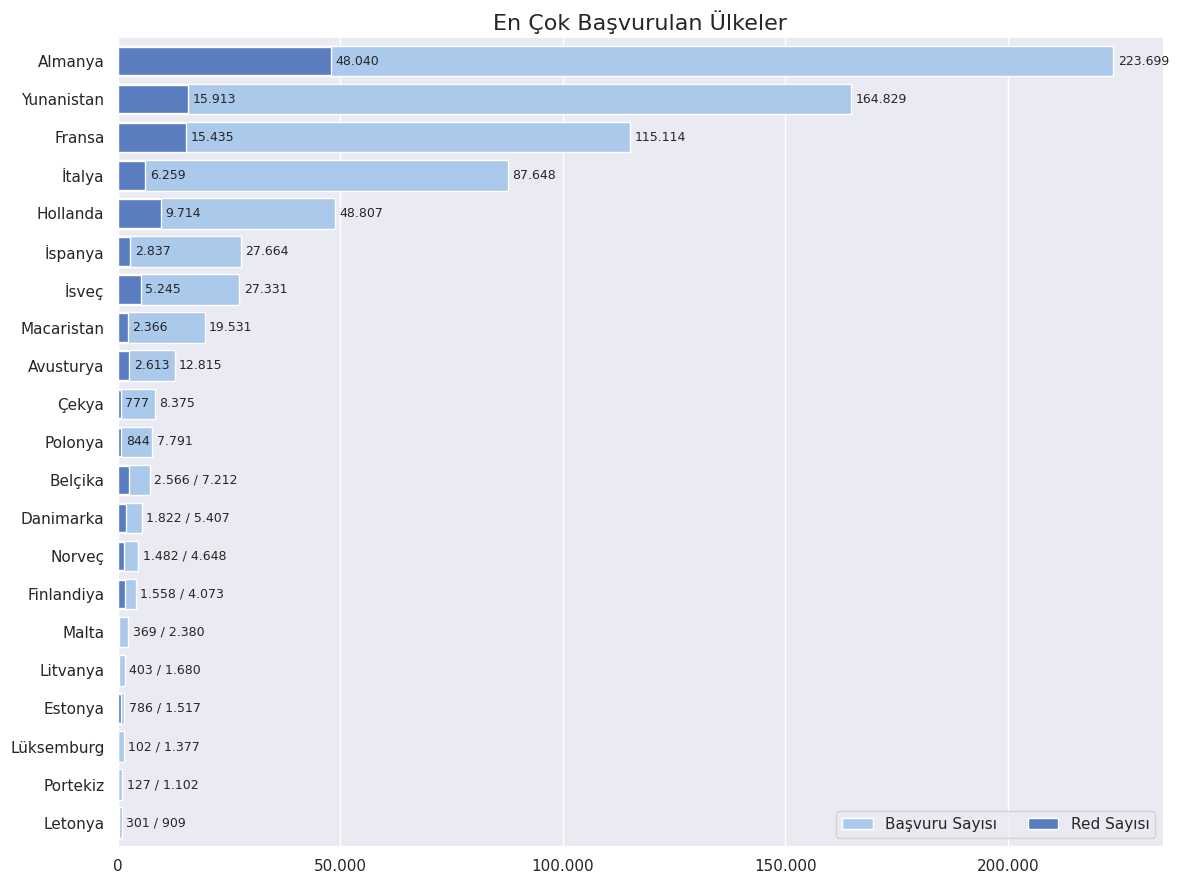

In [20]:
df = df.sort_values(by=['apply'], ascending=False)

f, ax = plt.subplots(figsize=(12, 9))

# Plot the total apply
sns.set_color_codes("pastel")
sns.barplot(x="apply", y="country", data=df,
            label="Başvuru Sayısı", color="b")

# Plot the reject
sns.set_color_codes("muted")
sns.barplot(x="reject", y="country", data=df,
            label="Red Sayısı", color="b",width=0.75)



ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="",xlabel="")
ax.set_title("En Çok Başvurulan Ülkeler", fontsize=16)
ax.set_yticklabels(ax.get_yticklabels(), )
sns.despine(left=True, bottom=True)

i=0
for _,row in df.iterrows():
    apply = row['apply']
    reject = row['reject']

    apply_x = apply + 1000
    reject_x = reject + 1000

    if apply < 7500:    
        ax.text(apply_x, i, f"{f'{reject:,.0f}'.replace(',','.')} / {f'{apply:,.0f}'.replace(',','.')}", va='center', fontsize=9, ha='left')
    else:        
        ax.text(apply_x, i, f"{f'{apply:,.0f}'.replace(',','.')}", va='center', fontsize=9, ha='left')
        ax.text(reject_x, i, f"{f'{reject:,.0f}'.replace(',','.')}", va='center', fontsize=9, ha='left')

    i+=1

xticks = []
for i in ax.get_xticklabels():
    xticks.append(f"{f'{int(i.get_text()):,.0f}'.replace(',','.')}")

ax.set_xticklabels(xticks)

ax.relim()
ax.autoscale_view()
ax.margins(y=0.01)  

f.tight_layout()

plt.show()

/tmp/ipykernel_294918/1710759900.py:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm, fraction=0.02, aspect=30,pad=0.001, orientation="horizontal", location="bottom", boundaries=(0,10,20,30,40,50))


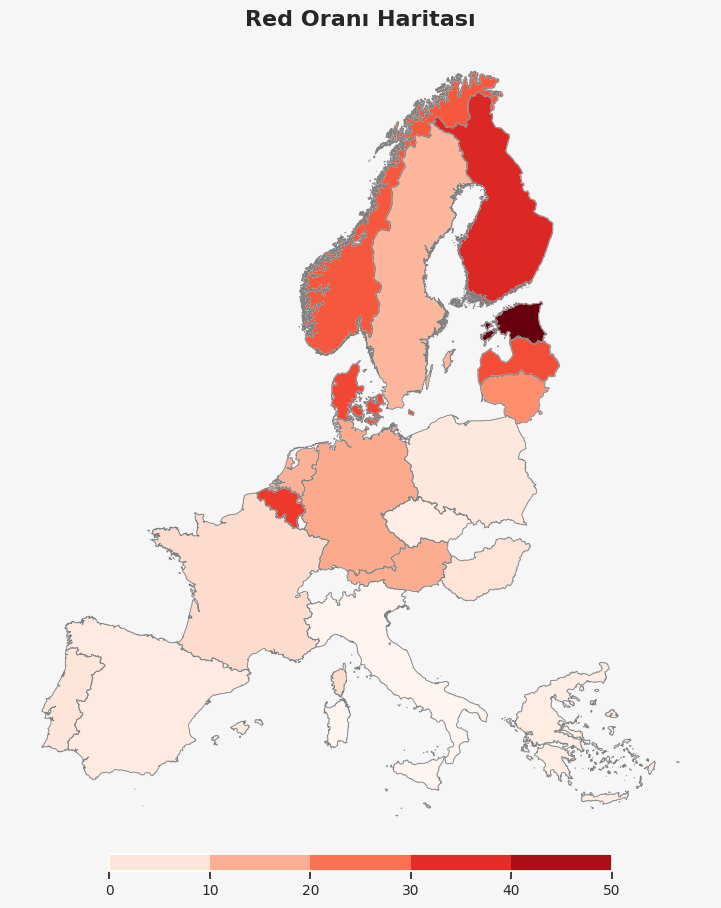

In [21]:
bg_color = "#F6F6F6"


world = gpd.read_file('../data/shapefiles/europeborder/Europe_borders.shp')
data = df.copy()

vmin = 0
vmax = data['rate'].max()

european_map = world.merge(data, on='NAME').to_crs(epsg=3035)

fig, ax = plt.subplots(figsize=(16, 9))
european_map.boundary.plot(ax=ax, linewidth=0.5, color='gray')  
european_map.plot(column='rate', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)

# scale map
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, fraction=0.02, aspect=30,pad=0.001, orientation="horizontal", location="bottom", boundaries=(0,10,20,30,40,50))
for t in cbar.ax.get_xticklabels():
    t.set_fontsize(10)

# bg color
fig.set_facecolor(bg_color)

ax.set_axis_off()
fig.tight_layout()

ax.set_title("Red Oranı Haritası", fontsize=16, fontdict={'fontweight': 'bold'})

plt.show()

